In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
c = 3*10**8
L = 5 * 10**6 *10**3

In [3]:
def transfer_func(theta,f):
    
    fs = c/(2*np.pi*L)
    
    Tau = np.sinc((f/(2*fs))*(1-np.cos(theta))) * np.exp(-1j*(f/(2*fs))*(3+np.cos(theta))) + np.sinc((f/(2*fs))*(1+np.cos(theta))) * np.exp(-1j*(f/(2*fs))*(1+np.cos(theta)))
    return np.abs(Tau)

In [4]:
transfer_func(np.pi,0.001)

1.979342527118797

### Single-Arm Extension 

$$ \delta l (t_2) = \frac{L sin^2\theta \ \tau(cos \theta,f)}{2} \frac{M^{5/3} (\pi f)^{2/3}}{r} \left[ -2 (1+cos^2 i) \ cos(2 \psi) \ cos(2 \pi f) - 4 cosi \ sin(2\psi)\ sin(2 \pi f) \right]$$

We can consider the strain to be of order of magnitude $10^{-19}$ and $L \approx 10^9$


$$ \delta l (t_2) =  -[2 (1+cos^2 i) \ cos(2 \psi) \ cos(2 \pi f) - 4 cosi \ sin(2\psi)\ sin(2 \pi f)]*sin^2\theta * 10^{-10}$$

So the extension depends on the inclination angle i, the polarisation angle $\psi$ and the orientation of the arm $\theta$


In [5]:
f = 10**(-3)

In [6]:
def response(theta,i,psi):

    csi = np.cos(i)
    cs = (1+csi**2) * np.cos(2*psi)
    sn = 2*csi * np.sin(2*psi)
    return np.sin(theta)**2 * (cs**2 + sn**2)**.5

In [7]:
theta = np.pi/3
i = np.linspace(0,180,100)*np.pi/180

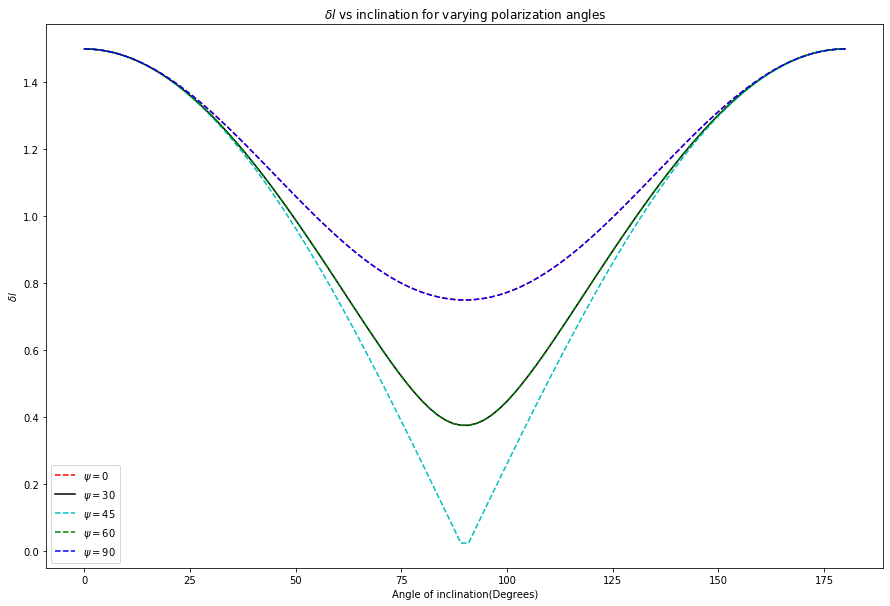

In [8]:
plt.figure(figsize=(15,10))
plt.plot(i*180/np.pi,response(theta,i,0),"r--",label="$\psi=0$")
plt.plot(i*180/np.pi,response(theta,i,30*np.pi/180),"k-",label="$\psi=30$")
plt.plot(i*180/np.pi,response(theta,i,45*np.pi/180),"c--",label="$\psi=45$")
plt.plot(i*180/np.pi,response(theta,i,60*np.pi/180),"g--",label="$\psi=60$")
plt.plot(i*180/np.pi,response(theta,i,90*np.pi/180),"b--",label="$\psi=90$")

plt.legend()
plt.xlabel("Angle of inclination(Degrees)")
plt.ylabel("$\delta l$")
plt.title("$\delta l$ vs inclination for varying polarization angles")
plt.savefig("responsevsinclination.pdf")

In [9]:
i = np.pi/3
theta = np.linspace(0,180,100)*np.pi/180


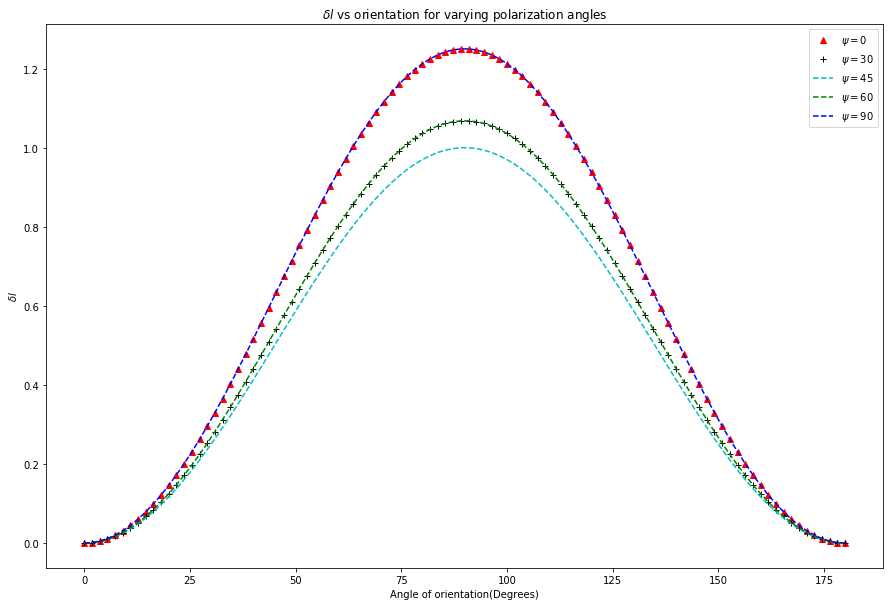

In [10]:
plt.figure(figsize=(15,10))
plt.plot(theta*180/np.pi,response(theta,i,0),"r^",label="$\psi=0$")
plt.plot(theta*180/np.pi,response(theta,i,30*np.pi/180),"k+",label="$\psi=30$")
plt.plot(theta*180/np.pi,response(theta,i,45*np.pi/180),"c--",label="$\psi=45$")
plt.plot(theta*180/np.pi,response(theta,i,60*np.pi/180),"g--",label="$\psi=60$")
plt.plot(theta*180/np.pi,response(theta,i,90*np.pi/180),"b--",label="$\psi=90$")

plt.legend()
plt.xlabel("Angle of orientation(Degrees)")
plt.ylabel("$\delta l$")
plt.title("$\delta l$ vs orientation for varying polarization angles")
plt.savefig("responsevsorientation.pdf")

In [11]:
theta = np.pi/3
psi = np.linspace(0,90,100)*np.pi/180

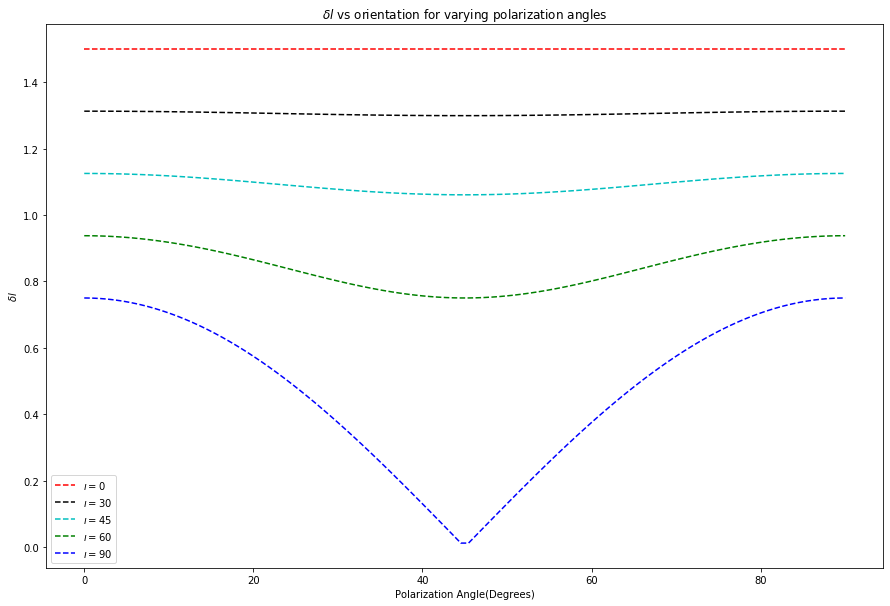

In [13]:
plt.figure(figsize=(15,10))
plt.plot(psi*180/np.pi,response(theta,0,psi),"r--",label="$\i=0$")
plt.plot(psi*180/np.pi,response(theta,30*np.pi/180,psi),"k--",label="$\i=30$")
plt.plot(psi*180/np.pi,response(theta,45*np.pi/180,psi),"c--",label="$\i=45$")
plt.plot(psi*180/np.pi,response(theta,60*np.pi/180,psi),"g--",label="$\i=60$")
plt.plot(psi*180/np.pi,response(theta,90*np.pi/180,psi),"b--",label="$\i=90$")

plt.legend()
plt.xlabel("Polarization Angle(Degrees)")
plt.ylabel("$\delta l$")
plt.title("$\delta l$ vs orientation for varying polarization angles")
plt.savefig("responsevsorientationofbinary.pdf")